# Neural Networks Sprint Challenge

## 1) Define the following terms:

- Neuron
  - The base unit of a neural network. Accepts input data, applies a vector of weights, adds a bias, and applies an acitvation function
- Input Layer
  - The input data, one node per feature/attribute
- Hidden Layer
  - A layer of nodes that is neither the input nor the output layer. We cannot directly observe data in these layers.
- Output Layer
  - The final layer that returns our output, typically a prediction along a continuous number line or a class probability.
- Activation
  - A function that applies a transformaion to the data. Popular choices are sigmoid and tanh, which both 'squishify' our data to the 0:1 or -1:1 range.
- Backpropagation
  - The method by which neural networks update weight vectors for each node, in one epoch. Using the derivative of the node's activation function, backpropagation can re-scale weights to minimize a global loss function.

## 2) Create a perceptron class that can model the behavior of an AND gate. You can use the following table as your training data:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 1  | 1  | 1  | 1 |
| 1  | 0  | 1  | 0 |
| 0  | 1  | 1  | 0 |
| 0  | 0  | 1  | 0 |

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
class Perceptron(object):
    def __init__(self, rate = 0.1, n_iter = 10):
        self.rate = rate
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)
        self.errors = []
        
        for i in range(self.n_iter):
            err = 0
            for x_i, y_i in zip(X, y):
                delta_w = self.rate * (y_i - self.predict(x_i))
                self.weights[0] += delta_w
                self.weights[1:] += delta_w * x_i
                err += int(delta_w != 0.0)
            self.errors.append(err)
            
        return self
    
    def predict(self, X):
        net_input = np.dot(X, self.weights[1:]) + self.weights[0]
        return np.where(net_input >= 0.0, 1, -1)

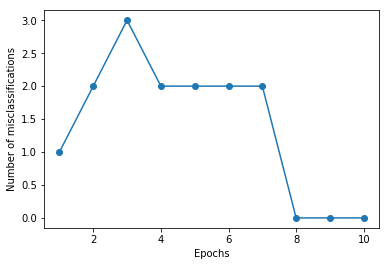

In [4]:
df = pd.DataFrame({
    'x1':[1, 1, 0, 0],
    'x2':[1, 0, 1, 0],
    'x3':[1, 1, 1, 1],
    'y': [1, 0, 0, 0]
})

X = df.drop(columns=['y']).values
y = df['y'] * 2 - 1

pn = Perceptron(rate = 0.1, n_iter = 10)
pn.fit(X, y)

plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## 3) Implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights. 
- Your network must have one hidden layer. 
- You do not have to update weights via gradient descent. You can use something like the derivative of the sigmoid function to update weights.
- Train your model on the Heart Disease dataset from UCI:

[Github Dataset](https://github.com/ryanleeallred/datasets/blob/master/heart.csv)

[Raw File on Github](https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv)


In [97]:
class MultiLayerPerceptron(object):
    """MLP with one hidden layer and one output layer"""
    def __init__(self, n_input_nodes, n_hidden_nodes, n_output_nodes):
        self.n_input_nodes = n_input_nodes
        self.n_hidden_nodes = n_hidden_nodes
        self.n_output_nodes = n_output_nodes
        
        self.L1_weights = np.random.randn(self.n_input_nodes,  self.n_hidden_nodes)
        self.L2_weights = np.random.randn(self.n_hidden_nodes, self.n_output_nodes)
    
    def predict(self, X):
        # hidden layer
        self.L1_sum = np.dot(X, self.L1_weights)
        self.L1_activated = self.sigmoid(self.L1_sum)
        # output layer
        self.L2_sum = np.dot(self.L1_activated, self.L2_weights)
        self.L2_activated = self.sigmoid(self.L2_sum)
        return self.L2_activated
    
    def sigmoid(self, s):
        return 1 / (1 + np.exp(-s))
    
    def sigmoid_prime(self, s):
        return s * (1 - s)
    
    def backpropagate(self, X, y, output):
        self.output_error = y - output
        self.output_delta = self.output_error * self.sigmoid_prime(output)
        
        self.z2_error = self.output_delta.dot(self.L2_weights.T)
        self.z2_delta = self.z2_error * self.sigmoid_prime(self.L1_activated)
        
        self.L1_weights += X.T.dot(self.z2_delta)
        self.L2_weights += self.L1_activated.T.dot(self.output_delta)

    def fit(self, X, y, n_iter, silent=False):
        history = []
        for i in range(n_iter):
            y_pred = self.predict(X)
            loss = np.mean(np.square(y - y_pred))
            history.append(loss)
            if not silent:
                print(f'EPOCH {i+1} Loss: {loss}')
            self.backpropagate(X, y, y_pred)
            
        return history

### Testing from lecture example

array([[0.00273434],
       [0.9667386 ],
       [0.95659645],
       [0.9650304 ],
       [0.95864119],
       [0.05171516],
       [0.03167865]])

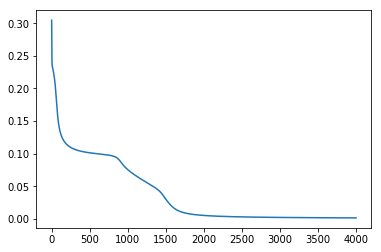

In [99]:
df = pd.DataFrame({
    'x1':[0, 0, 1, 0, 1, 1, 0],
    'x2':[0, 1, 0, 1, 0, 1, 0],
    'x3':[1, 1, 1, 0, 0, 1, 0],
    'y': [0, 1, 1, 1, 1, 0, 0]
})
X = df.drop(columns='y').values
y = df[['y']].values

nn = MultiLayerPerceptron(
    n_input_nodes=X.shape[1], 
    n_hidden_nodes=3, 
    n_output_nodes=1
)

history = nn.fit(X, y, 4000, silent=True)
plt.plot(history)
nn.predict(X)

### Sprint Example

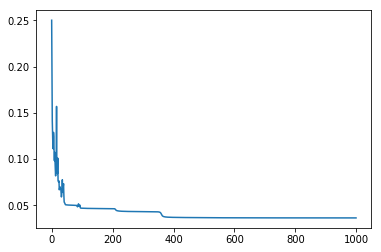

In [168]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/'
                 'ryanleeallred/datasets/master/heart.csv')

X = StandardScaler().fit_transform(df.drop(columns=['target']).values)
y = df[['target']].values

nn = MultiLayerPerceptron(
    n_input_nodes=X.shape[1], 
    n_hidden_nodes=8, 
    n_output_nodes=1
)

history = nn.fit(X, y, 1000, silent=True)
plt.plot(history);

## 4) Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy. 

- Use the Heart Disease Dataset (binary classification)
- Use an appropriate loss function for a binary classification task
- Use an appropriate activation function on the final layer of your network. 
- Train your model using verbose output for ease of grading.
- Use GridSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
- When hyperparameter tuning, show you work by adding code cells for each new experiment. 
- Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
- You must hyperparameter tune at least 5 parameters in order to get a 3 on this section.

In [181]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/'
                 'ryanleeallred/datasets/master/heart.csv')

X = StandardScaler().fit_transform(df.drop(columns=['target']).values)
y = df['target'].values

In [193]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam',
                metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=1)
param_grid = {
    'batch_size': [10, 20, 40, 50],
    'epochs': [20, 40]
}
grid = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    cv=3,
    n_jobs=-1,
)
grid_result = grid.fit(X, y)

Epoch 1/40
303/303 [==============================] - 0s 2ms/step - loss: 0.8672 - acc: 0.5479
Epoch 2/40
303/303 [==============================] - 0s 165us/step - loss: 0.7509 - acc: 0.5545
Epoch 3/40
303/303 [==============================] - 0s 162us/step - loss: 0.6576 - acc: 0.5875
Epoch 4/40
303/303 [==============================] - 0s 152us/step - loss: 0.5923 - acc: 0.6502
Epoch 5/40
303/303 [==============================] - 0s 145us/step - loss: 0.5406 - acc: 0.7195
Epoch 6/40
303/303 [==============================] - 0s 201us/step - loss: 0.5036 - acc: 0.7426
Epoch 7/40
303/303 [==============================] - 0s 162us/step - loss: 0.4744 - acc: 0.7624
Epoch 8/40
303/303 [==============================] - 0s 155us/step - loss: 0.4514 - acc: 0.7822
Epoch 9/40
303/303 [==============================] - 0s 178us/step - loss: 0.4324 - acc: 0.7921
Epoch 10/40
303/303 [==============================] - 0s 165us/step - loss: 0.4169 - acc: 0.8020
Epoch 11/40
303/303 [==========

In [194]:
retults = pd.DataFrame({
    'mean': grid_result.cv_results_['mean_test_score'], 
    'Stdev': grid_result.cv_results_['std_test_score'], 
    'params': grid_result.cv_results_['params']}
)

retults.sort_values('mean', ascending=False)

,mean,Stdev,params
1,0.683168,0.105094,"{'batch_size': 10, 'epochs': 40}"
7,0.669967,0.082969,"{'batch_size': 50, 'epochs': 40}"
3,0.646865,0.109758,"{'batch_size': 20, 'epochs': 40}"
4,0.636964,0.089048,"{'batch_size': 40, 'epochs': 20}"
0,0.610561,0.163358,"{'batch_size': 10, 'epochs': 20}"
2,0.587459,0.153030,"{'batch_size': 20, 'epochs': 20}"
6,0.570957,0.128924,"{'batch_size': 50, 'epochs': 20}"
5,0.561056,0.128924,"{'batch_size': 40, 'epochs': 40}"
